In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# loading datasets
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# remove spaces in column names
train.columns = train.columns.str.replace(' ', '')
test.columns = test.columns.str.replace(' ','')

In [3]:
# Convert some categorical features to numerical features
# for train dataset

for var in train.loc[:, 'LandSlope']:
    if var == 'Gtl':
        train.loc[:, 'LandSlope'] = 3
    elif var == 'Mod':
        train.loc[:, 'LandSlope'] = 2
    elif var == 'Sev':
        train.loc[:, 'LandSlope'] = 1
    else:
        train.loc[:, 'LandSlope'] = 0

for var in train.loc[:, 'ExterQual']:
    if var == 'Ex':
        train.loc[:, 'ExterQual'] = 5
    elif var == 'Gd':
        train.loc[:, 'ExterQual'] = 4
    elif var == 'TA':
        train.loc[:, 'ExterQual'] = 3
    elif var == 'Fa':
        train.loc[:, 'ExterQual'] = 2
    elif var == 'Po':
        train.loc[:, 'ExterQual'] = 1
    else:
        train.loc[:, 'ExterQual'] = 0

for var in train.loc[:, 'ExterCond']:
    if var == 'Ex':
        train.loc[:, 'ExterCond'] = 5
    elif var == 'Gd':
        train.loc[:, 'ExterCond'] = 4
    elif var == 'TA':
        train.loc[:, 'ExterCond'] = 3
    elif var == 'Fa':
        train.loc[:, 'ExterCond'] = 2
    elif var == 'Po':
        train.loc[:, 'ExterCond'] = 1
    else:
        train.loc[:, 'ExterCond'] = 0
        
for var in train.loc[:, 'BsmtQual']:
    if var == 'Ex':
        train.loc[:, 'BsmtQual'] = 5
    elif var == 'Gd':
        train.loc[:, 'BsmtQual'] = 4
    elif var == 'TA':
        train.loc[:, 'BsmtQual'] = 3
    elif var == 'Fa':
        train.loc[:, 'BsmtQual'] = 2
    elif var == 'Po':
        train.loc[:, 'BsmtQual'] = 1
    else:
        train.loc[:, 'BsmtQual'] = 0
        
for var in train.loc[:, 'BsmtCond']:
    if var == 'Ex':
        train.loc[:, 'BsmtCond'] = 5
    elif var == 'Gd':
        train.loc[:, 'BsmtCond'] = 4
    elif var == 'TA':
        train.loc[:, 'BsmtCond'] = 3
    elif var == 'Fa':
        train.loc[:, 'BsmtCond'] = 2
    elif var == 'Po':
        train.loc[:, 'BsmtCond'] = 1
    else:
        train.loc[:, 'BsmtCond'] = 0
        
for var in train.loc[:, 'BsmtExposure']:
    if var == 'Gd':
        train.loc[:, 'BsmtExposure'] = 4
    elif var == 'Av':
        train.loc[:, 'BsmtExposure'] = 3
    elif var == 'Mn':
        train.loc[:, 'BsmtExposure'] = 2
    elif var == 'No':
        train.loc[:, 'BsmtExposure'] = 1
    else:
        train.loc[:, 'BsmtExposure'] = 0
        
for var in train.loc[:, 'BsmtFinType1']:
    if var == 'GLQ':
        train.loc[:, 'BsmtFinType1'] = 6
    elif var == 'ALQ':
        train.loc[:, 'BsmtFinType1'] = 5
    elif var == 'BLQ':
        train.loc[:, 'BsmtFinType1'] = 4
    elif var == 'Rec':
        train.loc[:, 'BsmtFinType1'] = 3
    elif var == 'LwQ':
        train.loc[:, 'BsmtFinType1'] = 2
    elif var == 'Unf':
        train.loc[:, 'BsmtFinType1'] = 1
    else:
        train.loc[:, 'BsmtFinType1'] = 0
        
for var in train.loc[:, 'BsmtFinType2']:
    if var == 'GLQ':
        train.loc[:, 'BsmtFinType2'] = 6
    elif var == 'ALQ':
        train.loc[:, 'BsmtFinType2'] = 5
    elif var == 'BLQ':
        train.loc[:, 'BsmtFinType2'] = 4
    elif var == 'Rec':
        train.loc[:, 'BsmtFinType2'] = 3
    elif var == 'LwQ':
        train.loc[:, 'BsmtFinType2'] = 2
    elif var == 'Unf':
        train.loc[:, 'BsmtFinType2'] = 1
    else:
        train.loc[:, 'BsmtFinType2'] = 0
        
for var in train.loc[:, 'HeatingQC']:
    if var == 'Ex':
        train.loc[:, 'HeatingQC'] = 5
    elif var == 'Gd':
        train.loc[:, 'HeatingQC'] = 4
    elif var == 'TA':
        train.loc[:, 'HeatingQC'] = 3
    elif var == 'Fa':
        train.loc[:, 'HeatingQC'] = 2
    elif var == 'Po':
        train.loc[:, 'HeatingQC'] = 1
    else:
        train.loc[:, 'HeatingQC'] = 0
        
for var in train.loc[:, 'KitchenQual']:
    if var == 'Ex':
        train.loc[:, 'KitchenQual'] = 5
    elif var == 'Gd':
        train.loc[:, 'KitchenQual'] = 4
    elif var == 'TA':
        train.loc[:, 'KitchenQual'] = 3
    elif var == 'Fa':
        train.loc[:, 'KitchenQual'] = 2
    elif var == 'Po':
        train.loc[:, 'KitchenQual'] = 1
    else:
        train.loc[:, 'KitchenQual'] = 0

for var in train.loc[:, 'FireplaceQu']:
    if var == 'Ex':
        train.loc[:, 'FireplaceQu'] = 5
    elif var == 'Gd':
        train.loc[:, 'FireplaceQu'] = 4
    elif var == 'TA':
        train.loc[:, 'FireplaceQu'] = 3
    elif var == 'Fa':
        train.loc[:, 'FireplaceQu'] = 2
    elif var == 'Po':
        train.loc[:, 'FireplaceQu'] = 1
    else:
        train.loc[:, 'FireplaceQu'] = 0

for var in train.loc[:, 'GarageFinish']:
    if var == 'Fin':
        train.loc[:, 'GarageFinish'] = 3
    elif var == 'RFn':
        train.loc[:, 'GarageFinish'] = 2
    elif var == 'Unf':
        train.loc[:, 'GarageFinish'] = 1
    else:
        train.loc[:, 'FireplaceQu'] = 0
        
for var in train.loc[:, 'GarageQual']:
    if var == 'Ex':
        train.loc[:, 'GarageQual'] = 5
    elif var == 'Gd':
        train.loc[:, 'GarageQual'] = 4
    elif var == 'TA':
        train.loc[:, 'GarageQual'] = 3
    elif var == 'Fa':
        train.loc[:, 'GarageQual'] = 2
    elif var == 'Po':
        train.loc[:, 'GarageQual'] = 1
    else:
        train.loc[:, 'GarageQual'] = 0

for var in train.loc[:, 'GarageCond']:
    if var == 'Ex':
        train.loc[:, 'GarageCond'] = 5
    elif var == 'Gd':
        train.loc[:, 'GarageCond'] = 4
    elif var == 'TA':
        train.loc[:, 'GarageCond'] = 3
    elif var == 'Fa':
        train.loc[:, 'GarageCond'] = 2
    elif var == 'Po':
        train.loc[:, 'GarageCond'] = 1
    else:
        train.loc[:, 'GarageCond'] = 0
        
for var in train.loc[:, 'PoolQC']:
    if var == 'Ex':
        train.loc[:, 'PoolQC'] = 4
    elif var == 'Gd':
        train.loc[:, 'PoolQC'] = 3
    elif var == 'TA':
        train.loc[:, 'PoolQC'] = 2
    elif var == 'Fa':
        train.loc[:, 'PoolQC'] = 1
    else:
        train.loc[:, 'PoolQC'] = 0
        
for var in train.loc[:, 'Fence']:
    if var == 'GdPrv':
        train.loc[:, 'Fence'] = 4
    elif var == 'MnPrv':
        train.loc[:, 'Fence'] = 3
    elif var == 'GdWo':
        train.loc[:, 'Fence'] = 2
    elif var == 'MnWw':
        train.loc[:, 'Fence'] = 1
    else:
        train.loc[:, 'Fence'] = 0

In [4]:
# Convert some categorical features to numerical features
# for test dataset

for var in test.loc[:, 'LandSlope']:
    if var == 'Gtl':
        test.loc[:, 'LandSlope'] = 3
    elif var == 'Mod':
        test.loc[:, 'LandSlope'] = 2
    elif var == 'Sev':
        test.loc[:, 'LandSlope'] = 1
    else:
        test.loc[:, 'LandSlope'] = 0

for var in test.loc[:, 'ExterQual']:
    if var == 'Ex':
        test.loc[:, 'ExterQual'] = 5
    elif var == 'Gd':
        test.loc[:, 'ExterQual'] = 4
    elif var == 'TA':
        test.loc[:, 'ExterQual'] = 3
    elif var == 'Fa':
        test.loc[:, 'ExterQual'] = 2
    elif var == 'Po':
        test.loc[:, 'ExterQual'] = 1
    else:
        test.loc[:, 'ExterQual'] = 0

for var in test.loc[:, 'ExterCond']:
    if var == 'Ex':
        test.loc[:, 'ExterCond'] = 5
    elif var == 'Gd':
        test.loc[:, 'ExterCond'] = 4
    elif var == 'TA':
        test.loc[:, 'ExterCond'] = 3
    elif var == 'Fa':
        test.loc[:, 'ExterCond'] = 2
    elif var == 'Po':
        test.loc[:, 'ExterCond'] = 1
    else:
        test.loc[:, 'ExterCond'] = 0
        
for var in test.loc[:, 'BsmtQual']:
    if var == 'Ex':
        test.loc[:, 'BsmtQual'] = 5
    elif var == 'Gd':
        test.loc[:, 'BsmtQual'] = 4
    elif var == 'TA':
        test.loc[:, 'BsmtQual'] = 3
    elif var == 'Fa':
        test.loc[:, 'BsmtQual'] = 2
    elif var == 'Po':
        test.loc[:, 'BsmtQual'] = 1
    else:
        test.loc[:, 'BsmtQual'] = 0
        
for var in test.loc[:, 'BsmtCond']:
    if var == 'Ex':
        test.loc[:, 'BsmtCond'] = 5
    elif var == 'Gd':
        test.loc[:, 'BsmtCond'] = 4
    elif var == 'TA':
        test.loc[:, 'BsmtCond'] = 3
    elif var == 'Fa':
        test.loc[:, 'BsmtCond'] = 2
    elif var == 'Po':
        test.loc[:, 'BsmtCond'] = 1
    else:
        test.loc[:, 'BsmtCond'] = 0
        
for var in test.loc[:, 'BsmtExposure']:
    if var == 'Gd':
        test.loc[:, 'BsmtExposure'] = 4
    elif var == 'Av':
        test.loc[:, 'BsmtExposure'] = 3
    elif var == 'Mn':
        test.loc[:, 'BsmtExposure'] = 2
    elif var == 'No':
        test.loc[:, 'BsmtExposure'] = 1
    else:
        test.loc[:, 'BsmtExposure'] = 0
        
for var in test.loc[:, 'BsmtFinType1']:
    if var == 'GLQ':
        test.loc[:, 'BsmtFinType1'] = 6
    elif var == 'ALQ':
        test.loc[:, 'BsmtFinType1'] = 5
    elif var == 'BLQ':
        test.loc[:, 'BsmtFinType1'] = 4
    elif var == 'Rec':
        test.loc[:, 'BsmtFinType1'] = 3
    elif var == 'LwQ':
        test.loc[:, 'BsmtFinType1'] = 2
    elif var == 'Unf':
        test.loc[:, 'BsmtFinType1'] = 1
    else:
        test.loc[:, 'BsmtFinType1'] = 0
        
for var in test.loc[:, 'BsmtFinType2']:
    if var == 'GLQ':
        test.loc[:, 'BsmtFinType2'] = 6
    elif var == 'ALQ':
        test.loc[:, 'BsmtFinType2'] = 5
    elif var == 'BLQ':
        test.loc[:, 'BsmtFinType2'] = 4
    elif var == 'Rec':
        test.loc[:, 'BsmtFinType2'] = 3
    elif var == 'LwQ':
        test.loc[:, 'BsmtFinType2'] = 2
    elif var == 'Unf':
        test.loc[:, 'BsmtFinType2'] = 1
    else:
        test.loc[:, 'BsmtFinType2'] = 0
        
for var in test.loc[:, 'HeatingQC']:
    if var == 'Ex':
        test.loc[:, 'HeatingQC'] = 5
    elif var == 'Gd':
        test.loc[:, 'HeatingQC'] = 4
    elif var == 'TA':
        test.loc[:, 'HeatingQC'] = 3
    elif var == 'Fa':
        test.loc[:, 'HeatingQC'] = 2
    elif var == 'Po':
        test.loc[:, 'HeatingQC'] = 1
    else:
        test.loc[:, 'HeatingQC'] = 0
        
for var in test.loc[:, 'KitchenQual']:
    if var == 'Ex':
        test.loc[:, 'KitchenQual'] = 5
    elif var == 'Gd':
        test.loc[:, 'KitchenQual'] = 4
    elif var == 'TA':
        test.loc[:, 'KitchenQual'] = 3
    elif var == 'Fa':
        test.loc[:, 'KitchenQual'] = 2
    elif var == 'Po':
        test.loc[:, 'KitchenQual'] = 1
    else:
        test.loc[:, 'KitchenQual'] = 0

for var in test.loc[:, 'FireplaceQu']:
    if var == 'Ex':
        test.loc[:, 'FireplaceQu'] = 5
    elif var == 'Gd':
        test.loc[:, 'FireplaceQu'] = 4
    elif var == 'TA':
        test.loc[:, 'FireplaceQu'] = 3
    elif var == 'Fa':
        test.loc[:, 'FireplaceQu'] = 2
    elif var == 'Po':
        test.loc[:, 'FireplaceQu'] = 1
    else:
        test.loc[:, 'FireplaceQu'] = 0

for var in test.loc[:, 'GarageFinish']:
    if var == 'Fin':
        test.loc[:, 'GarageFinish'] = 3
    elif var == 'RFn':
        test.loc[:, 'GarageFinish'] = 2
    elif var == 'Unf':
        test.loc[:, 'GarageFinish'] = 1
    else:
        test.loc[:, 'FireplaceQu'] = 0
        
for var in test.loc[:, 'GarageQual']:
    if var == 'Ex':
        test.loc[:, 'GarageQual'] = 5
    elif var == 'Gd':
        test.loc[:, 'GarageQual'] = 4
    elif var == 'TA':
        test.loc[:, 'GarageQual'] = 3
    elif var == 'Fa':
        test.loc[:, 'GarageQual'] = 2
    elif var == 'Po':
        test.loc[:, 'GarageQual'] = 1
    else:
        test.loc[:, 'GarageQual'] = 0

for var in test.loc[:, 'GarageCond']:
    if var == 'Ex':
        test.loc[:, 'GarageCond'] = 5
    elif var == 'Gd':
        test.loc[:, 'GarageCond'] = 4
    elif var == 'TA':
        test.loc[:, 'GarageCond'] = 3
    elif var == 'Fa':
        test.loc[:, 'GarageCond'] = 2
    elif var == 'Po':
        test.loc[:, 'GarageCond'] = 1
    else:
        test.loc[:, 'GarageCond'] = 0
        
for var in test.loc[:, 'PoolQC']:
    if var == 'Ex':
        test.loc[:, 'PoolQC'] = 4
    elif var == 'Gd':
        test.loc[:, 'PoolQC'] = 3
    elif var == 'TA':
        test.loc[:, 'PoolQC'] = 2
    elif var == 'Fa':
        test.loc[:, 'PoolQC'] = 1
    else:
        test.loc[:, 'PoolQC'] = 0
        
for var in test.loc[:, 'Fence']:
    if var == 'GdPrv':
        test.loc[:, 'Fence'] = 4
    elif var == 'MnPrv':
        test.loc[:, 'Fence'] = 3
    elif var == 'GdWo':
        test.loc[:, 'Fence'] = 2
    elif var == 'MnWw':
        test.loc[:, 'Fence'] = 1
    else:
        test.loc[:, 'Fence'] = 0

In [5]:
# save our target variable
y = train['SalePrice']

# cleaning numerical features
numerical_features = list(train._get_numeric_data().drop(['Id', 'PID', 'SalePrice'], axis=1))
features = numerical_features

for feature in numerical_features:
    train[feature] = train[feature].fillna(0)
    test[feature] = test[feature].fillna(0)

# cleaning categorical features
categorical_features = list(train.select_dtypes(include='object').columns)

for col in categorical_features:
    train[col] = train[col].fillna('N/A')
    test[col] = test[col].fillna('N/A')
    
    train_values = sorted(list(train[col].unique()))
    test_values = sorted(list(test[col].unique()))
    
    categories = set(train_values + test_values)
    
    train[col] = pd.Categorical(train[col], categories=categories)
    test[col] = pd.Categorical(test[col], categories=categories)

In [6]:
# dummy categorical variables
train_dummies = pd.get_dummies(train[categorical_features], drop_first=True)
test_dummies = pd.get_dummies(test[categorical_features], drop_first=True)

In [7]:
# our final train/test data
X_train = pd.concat([train_dummies, train[numerical_features]], axis=1)
X_test = pd.concat([test_dummies, test[numerical_features]], axis=1)

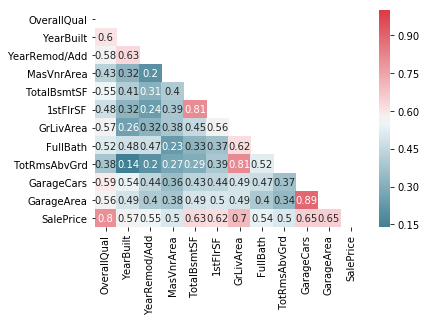

In [8]:
# heatmap of variables vs SalePrice inside the train dataset (abs(corr) > .5)
high_corr = train[numerical_features].loc[:, train.corrwith(train['SalePrice']).abs() > .5]
high_corr['SalePrice'] = train['SalePrice']
corr = high_corr.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(high_corr.corr(), cmap=cmap,annot=True, mask=mask);
high_corr.drop(['SalePrice'], axis=1, inplace=True)

In [9]:
# new train/test set with higher variables that have higher correlation vs SalePrice
new_train = train[high_corr.columns]
new_test = test[high_corr.columns]

Data only had higher correlations did NOT help reducing RMSE on test data nor reduce linear regression scores.

In [10]:
# train/test split. 7/3.
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y, test_size=0.3, random_state=42)

In [11]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_split, y_train_split)

print("LR RMSE:", mean_squared_error(y_test_split, lr.predict(X_test_split)) ** 0.5)
print("LR Score:", lr.score(X_test_split, y_test_split))

LR RMSE: 25226.538339226787
LR Score: 0.8935364265996774


In [12]:
# Finding the best Alpha for Lasso
alphas = [0.001, 0.01, 0.1, 1, 10]
print('Find Best Alpha for Lasso')
print('-'*35)
for alpha in alphas:
    # instantiate and fit model
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=42, max_iter=100000)
    lasso.fit(X_train_split, y_train_split)
    # calculate errors
    new_train_error = mean_squared_error(y_train_split, lasso.predict(X_train_split)) ** 0.5
    new_validation_error = mean_squared_error(y_test_split, lasso.predict(X_test_split)) ** 0.5
    new_test_error = mean_squared_error(y_test_split, lasso.predict(X_test_split))** 0.5 
    score = lasso.score(X_test_split, y_test_split)
    # print errors as report
    print('alpha: {:7} | score: {:5}'.
          format(alpha, round(score,3)))

Find Best Alpha for Lasso
-----------------------------------
alpha:   0.001 | score: 0.894
alpha:    0.01 | score: 0.894
alpha:     0.1 | score: 0.894
alpha:       1 | score: 0.896
alpha:      10 | score:   0.9


In [13]:
# Fit Lasso with the best Alpha
lasso = Lasso(alpha=10, fit_intercept=True, random_state=42, max_iter=100000)
lasso.fit(X_train_split, y_train_split)
print("Lasso RMSE:", mean_squared_error(y_test_split, lasso.predict(X_test_split)) ** 0.5)
print("Lasso Score:", lasso.score(X_test_split, y_test_split))

Lasso RMSE: 24449.54381123143
Lasso Score: 0.8999937273912939


In [14]:
# Do the samething with Ridge
# Finding the best Alpha for Ridge
alphas = [0.001, 0.01, 0.1, 1, 10]
print('Find Best Alpha for Ridge')
print('-'*35)
for alpha in alphas:
    # instantiate and fit model
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=42, max_iter=100000)
    ridge.fit(X_train_split, y_train_split)
    # calculate errors
    new_train_error = mean_squared_error(y_train_split, ridge.predict(X_train_split)) ** 0.5
    new_validation_error = mean_squared_error(y_test_split, ridge.predict(X_test_split)) ** 0.5
    new_test_error = mean_squared_error(y_test_split, ridge.predict(X_test_split))** 0.5 
    score = ridge.score(X_test_split, y_test_split)
    # print errors as report
    print('alpha: {:7} | score: {:5}'.
          format(alpha, round(score,3)))

Find Best Alpha for Ridge
-----------------------------------
alpha:   0.001 | score: 0.894
alpha:    0.01 | score: 0.896
alpha:     0.1 | score: 0.896
alpha:       1 | score:  0.89
alpha:      10 | score: 0.894


In [15]:
# Fit Ridge with the best Alpha
ridge = Ridge(alpha=0.1, fit_intercept=True, random_state=42, max_iter=100000)
ridge.fit(X_train_split, y_train_split)
print("Ridge RMSE:", mean_squared_error(y_test_split, ridge.predict(X_test_split)) ** 0.5)
print("Ridge Score:", ridge.score(X_test_split, y_test_split))

Ridge RMSE: 24972.7076701102
Ridge Score: 0.8956681311333029


In [16]:
# Make Polynomial Features
pf =PolynomialFeatures(include_bias=False)
x_poly = pf.fit_transform(X_train_split)
x_test_poly = pf.fit_transform(X_test_split)
x_test_test_poly = pf.fit_transform(X_test)

# Put these in a DataFrame 
features = pf.get_feature_names(X_train_split.columns)
poly_df = pd.DataFrame(x_poly, columns=features)
poly_test_df = pd.DataFrame(x_test_poly, columns=features)
poly_test_set = pd.DataFrame(x_test_test_poly, columns=features)

In [17]:
rfe =  RFE(LinearRegression(), verbose=1, step=10000, n_features_to_select=150)
rfe.fit(poly_df, y_train_split)

Fitting estimator with 24309 features.
Fitting estimator with 14309 features.
Fitting estimator with 4309 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=150, step=10000, verbose=1)

In [18]:
print("RFE RMSE:", mean_squared_error(y_test_split, rfe.predict(poly_test_df)) ** 0.5)
print("RFE Score:", rfe.score(poly_test_df, y_test_split))

RFE RMSE: 30347.9432997335
RFE Score: 0.8459207172569104


In [19]:
# random forest for fun
rf =  RandomForestRegressor(random_state=42)
rf.fit(X_train_split, y_train_split)
print("RF RMSE:", mean_squared_error(y_test_split, rf.predict(X_test_split)) ** 0.5)
print("RF Score:", rf.score(X_test_split, y_test_split))

RF RMSE: 26038.105404149777
RF Score: 0.8865761246904492


| Model | Score | RMSE |
|-------|-------|------|
| Linear Regression | 0.894 | 25161 |
| Lasso | 0.901 | 24368 |
| Ridge | 0.899 | 24532 |
| RFE   | 0.844 | 30519 |       
| Random Forest | 0.888 | 25889     
<center>All datas are from test set.</center>


In [20]:
# predict SalePrice of houses using Lasso
ids = test['Id']
price = rf.predict(X_test)
df = pd.DataFrame({'Id': ids, 'SalePrice':price}) 
df.sort_values('Id', inplace=True)
df.to_csv('./test_submission.csv', index=False)